# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     |  Andrés González |
| **Fecha**      |  27/01/2024 |
| **Expediente** | 746843  |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
#saber que tipo de datos hay
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


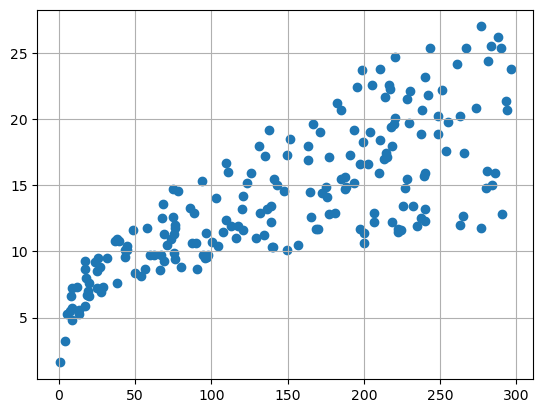

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(data['TV'], data['sales'])
plt.grid()

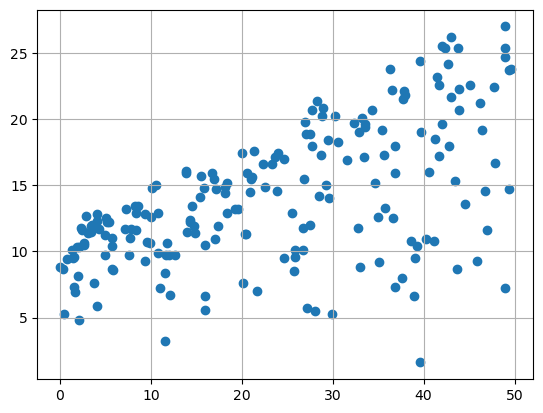

In [7]:
plt.figure()
plt.scatter(data['radio'], data['sales'])
plt.grid()

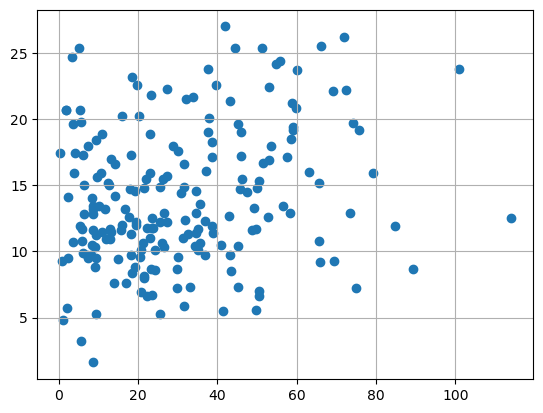

In [8]:
plt.figure()
plt.scatter(data['newspaper'], data['sales'])
plt.grid()

**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

Si hay uno que no hay relación se puede dejar de invertir en ese medio de publicidad.

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Si nos sirve, ya que si si hay una relación entre más invirtamos en la publicidad más ventas tendríamos.

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [9]:
import numpy as np

In [11]:
X=data['TV']
Y=data['sales']

In [12]:
x_column = np.reshape(X, [len(X), 1])
y_column = np.reshape(Y, [len(Y), 1])

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_column, y_column)

LinearRegression()

In [16]:
model.intercept_

array([7.03259355])

In [17]:
model.coef_

array([[0.04753664]])

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

La población es todo y la muestra es un extracto de la población

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Cuando es una regresión con la población no se necesita sacar los coeficientes de exactitud

### Para todo i el error debe seguir una distribucion normal independiente e identicamente distribuida con media 0 y una varianza constante

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [18]:
y_pred = model.predict(x_column)

In [19]:
y_var = np.var(y_column)
y_var

27.085743750000002

In [20]:
RSS = np.sum((y_pred - y_column)**2)
RSS

2102.5305831313512

In [21]:
sigma2=RSS/(200-2)
sigma2

10.618841328946218

In [22]:
Xpromedio=x_column.mean()

In [23]:
SEb1=sigma2/((np.sum((x_column-Xpromedio)**2)))
n = len(x_column)
SEb1

7.2393670390241845e-06

In [24]:
SEb0_s=sigma2*((1/n)+((Xpromedio**2)/(np.sum((x_column-Xpromedio)**2))))
SEb0_s

0.209620157958264

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [25]:
raizsigma=np.sqrt(sigma2)

In [26]:
B0=(model.intercept_)-(np.sqrt(SEb0_s)*2)
B0_1=(model.intercept_)+(np.sqrt(SEb0_s)*2)
print(B0,B0_1)

[6.11690767] [7.94827943]


In [27]:
B1=(model.coef_)-2*(np.sqrt(SEb1))
B1_1=model.coef_+2*(np.sqrt(SEb1))
print(B1,B1_1)

[[0.04215543]] [[0.05291785]]


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

Ho representa que no hay la relación entre X y Y no es significativa
Hi: representa que si hay alguna relación.

Se usan las dos para poder probar si hay relación o no

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [28]:
t0=(model.intercept_-0)/np.sqrt(SEb0_s)
t0

array([15.36027517])

In [29]:
t1=(model.coef_-0)/np.sqrt(SEb1)
t1

array([[17.6676256]])

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [30]:
from scipy import stats

In [31]:
p_bj=2*(1-stats.t.cdf(np.abs(t0), n-2))
p_bj

array([0.])

In [32]:
p_bj1=2*(1-stats.t.cdf(np.abs(t1), n-2))
p_bj1

array([[0.]])

¿Se rechaza la hipótesis nula? ¿Qué significa?

***SI, se puede probar con el 95% de confianza que si hay relación entre X y Y, (EN LA TV)***

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

## REGRESIÓN PARA GASTOS EN RADIO

In [33]:
X_radio=data['radio']
Y=data['sales']

In [34]:
x_column = np.reshape(X_radio, [len(X_radio), 1])
y_column = np.reshape(Y, [len(Y), 1])

In [35]:
model_radio = LinearRegression()
model_radio.fit(x_column, y_column)

LinearRegression()

**COEFICIENTES**

In [36]:
model_radio.intercept_

array([9.3116381])

In [37]:
model_radio.coef_

array([[0.20249578]])

In [38]:
y_pred = model_radio.predict(x_column)

In [39]:
RSS = np.sum((y_pred - y_column)**2)
RSS

3618.479549025088

**ERRORES DE LOS COEFICIENTES**

In [40]:
n=len(x_column)
sigma2=RSS/(n-2)
sigma2

18.275149237500443

In [41]:
X_promedio=X_radio.mean()
X_promedio

23.264000000000006

In [42]:
SEb1_radio=sigma2/((np.sum((x_column-X_promedio)**2)))
SEb1_radio

0.00041662142732547643

In [43]:
SEb0_radio=sigma2*((1/n)+((X_promedio**2)/(np.sum((x_column-X_promedio)**2))))
SEb0_radio

0.3168569687031188

**INTERVALOS DE CONFIANZA**

In [44]:
#Intervalos de confianza
B0=(model_radio.intercept_)-(np.sqrt(SEb0_radio)*2)
B0_1=(model_radio.intercept_)+(np.sqrt(SEb0_radio)*2)
print(B0,B0_1)

[8.1858371] [10.43743909]


In [45]:
B1=(model_radio.coef_)-2*(np.sqrt(SEb1_radio))
B1_1=model_radio.coef_+2*(np.sqrt(SEb1_radio))
print(B1,B1_1)

[[0.16167317]] [[0.2433184]]


**Valores t-estadístico**

In [46]:
t0_radio=(model_radio.intercept_-0)/np.sqrt(SEb0_radio)
t0_radio

array([16.54224531])

In [47]:
t1_radio=(model_radio.coef_-0)/np.sqrt(SEb1_radio)
t1_radio

array([[9.92076547]])

**P-VALUES**

In [48]:
p_bj=2*(1-stats.t.cdf(np.abs(t0_radio), n-2))
print(p_bj)

[0.]


In [77]:
p_bj1_radio=2*(1-stats.t.cdf(np.abs(t1_radio), n-2))
print(p_bj1_radio)

[[0.]]


**OBSERVACIONES**:

-  El P-value es0 por lo que nos dice que es muy poco probable que sea al azar la relación entre las ventas y la publicidad en radio.

## REGRESION DE NEWSPAPER

In [50]:
X_per=data['newspaper']
Y=data['sales']

In [61]:
x_column = np.reshape(X_per, [len(X_per), 1])
y_column = np.reshape(Y, [len(Y), 1])

In [62]:
model_per = LinearRegression()
model_per.fit(x_column, y_column)

LinearRegression()

**coeficientes**

In [63]:
model_per.intercept_

array([12.35140707])

In [64]:
model_per.coef_

array([[0.0546931]])

In [65]:
y_pred = model_per.predict(x_column)

In [66]:
RSS = np.sum((y_pred - y_column)**2)
RSS

5134.804544111939

**ERROR DE LOS COEFICIENTES**

In [67]:
n=len(x_column)
sigma2=RSS/(n-2)
sigma2

25.933356283393632

In [68]:
X_promedio=X_radio.mean()
X_promedio

23.264000000000006

In [69]:
SEb1_per=sigma2/((np.sum((x_column-X_promedio)**2)))
SEb1_per

0.00024694629983324276

In [70]:
SEb0_per=sigma2*((1/n)+((X_promedio**2)/(np.sum((x_column-X_promedio)**2))))
SEb0_per

0.26331750106324175

**INtérvalos de confianza**

In [71]:
B0_per=(model_per.intercept_)-(np.sqrt(SEb0_per)*2)
B0_1_per=(model_per.intercept_)+(np.sqrt(SEb0_per)*2)
print(B0_per,B0_1_per)

[11.32511763] [13.3776965]


In [72]:
B1_per=(model_per.coef_)-2*(np.sqrt(SEb1_per))
B1_1_per=model_per.coef_+2*(np.sqrt(SEb1_per))
print(B1_per,B1_1_per)

[[0.02326405]] [[0.08612215]]


**VALORES T-ESTADÍSTICO**

In [73]:
t0_per=(model_per.intercept_-0)/np.sqrt(SEb0_per)
t0_per

array([24.07002674])

In [74]:
t1_per=(model_per.coef_-0)/np.sqrt(SEb1_per)
t1_per

array([[3.48041688]])

**P-VALUES**

In [75]:
p_bj_per=2*(1-stats.t.cdf(np.abs(t0_per), n-2))
print(p_bj_per)

[0.]


In [78]:
p_bj1_per=2*(1-stats.t.cdf(np.abs(t1_per), n-2))
print(p_bj1_per)

[[0.00061576]]


**Observaciones**:

- El P-value es muy cercano a 0 por lo que nos dice que es muy poco probable que sea al azar la relación entre las ventas y la publicidad en periódico.

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [47]:
#OTRA MANERA DE SACAR LOS DATOS
n=len(Y)
x_radio=np.reshape(data['radio'], [ -1,1])
x_tv=np.reshape(data['TV'], [ -1,1])
x_new=np.reshape(data['newspaper'], [ -1,1])
ones=np.ones([n,1])
X=np.hstack((ones,x_tv,x_radio,x_new))
import statsmodels.api as sm
ols=sm.OLS(Y,X)
ols_results=ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        17:29:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

En la regresión simple los valores se sesgan entonces el p-value sube para newspaper, cuando es individual podemos observar que los p-values de news paper estaban sesgados, porque está más grande de lo que da de manera simple, es decir que en realidad el newspaper no tiene una relación alta con las ventas.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*